In [1]:
import pandas as pd
import matplotlib.pyplot as plt

meta_ads = pd.read_csv('data.csv')


In [2]:
print(meta_ads.head())

    ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
0  708746      17/08/2017    17/08/2017         916         103916  30-34   
1  708749      17/08/2017    17/08/2017         916         103917  30-34   
2  708771      17/08/2017    17/08/2017         916         103920  30-34   
3  708815      30/08/2017    30/08/2017         916         103928  30-34   
4  708818      17/08/2017    17/08/2017         916         103928  30-34   

  gender  interest1  interest2  interest3  impressions  clicks  spent  \
0      M         15         17         17       7350.0       1   1.43   
1      M         16         19         21      17861.0       2   1.82   
2      M         20         25         22        693.0       0   0.00   
3      M         28         32         32       4259.0       1   1.25   
4      M         28         33         32       4133.0       1   1.29   

   total_conversion  approved_conversion  
0               2.0                  1.0  
1           

In [3]:
print(meta_ads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [4]:
print(meta_ads.describe())

              ad_id    interest1     interest2    interest3   impressions  \
count  1.143000e+03  1143.000000  1.143000e+03  1143.000000  1.143000e+03   
mean   9.872611e+05    33.884514  1.180606e+05    42.474191  6.872500e+04   
std    1.939928e+05    27.560263  2.670506e+05    48.987248  2.067023e+05   
min    7.087460e+05     2.000000  3.000000e+00     0.000000  0.000000e+00   
25%    7.776325e+05    16.000000  2.200000e+01    19.000000  1.442650e+02   
50%    1.121185e+06    26.000000  3.300000e+01    27.000000  3.142000e+03   
75%    1.121804e+06    32.000000  9.889400e+04    38.000000  2.786400e+04   
max    1.314415e+06   120.000000  2.286228e+06   421.000000  3.052003e+06   

            clicks        spent  total_conversion  approved_conversion  
count  1143.000000  1143.000000        761.000000           761.000000  
mean     11.629921    17.597760          2.161629             0.768725  
std      27.347899    48.418711          4.062201             1.656445  
min       0.00

In [5]:
meta_ads['total_conversion'] = meta_ads['total_conversion'].fillna(0)
meta_ads['approved_conversion'] = meta_ads['approved_conversion'].fillna(0)

meta_ads['reporting_start'] = pd.to_datetime(meta_ads['reporting_start'])
meta_ads['reporting_end'] = pd.to_datetime(meta_ads['reporting_end'])

print(meta_ads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                1143 non-null   int64         
 1   reporting_start      1143 non-null   datetime64[ns]
 2   reporting_end        1143 non-null   datetime64[ns]
 3   campaign_id          1143 non-null   object        
 4   fb_campaign_id       1143 non-null   object        
 5   age                  1143 non-null   object        
 6   gender               1143 non-null   object        
 7   interest1            1143 non-null   int64         
 8   interest2            1143 non-null   int64         
 9   interest3            1143 non-null   int64         
 10  impressions          1143 non-null   float64       
 11  clicks               1143 non-null   int64         
 12  spent                1143 non-null   float64       
 13  total_conversion     1143 non-nul

C:\Users\User\AppData\Local\Temp\ipykernel_21304\421208086.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meta_ads['reporting_start'] = pd.to_datetime(meta_ads['reporting_start'])
C:\Users\User\AppData\Local\Temp\ipykernel_21304\421208086.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  meta_ads['reporting_end'] = pd.to_datetime(meta_ads['reporting_end'])


In [6]:
print(meta_ads.groupby('gender')[['cpc', 'cpcon']].mean())

KeyError: "Columns not found: 'cpc', 'cpcon'"

In [7]:
import numpy as np
meta_ads['cpc'] = np.where(meta_ads['clicks'] > 0, meta_ads['spent'] / meta_ads['clicks'], 0)
meta_ads['cpcon'] = np.where(meta_ads['approved_conversion'] > 0, meta_ads['spent'] / meta_ads['approved_conversion'], 0)

In [8]:
print(meta_ads.groupby('gender')[['cpc', 'cpcon']].mean())

             cpc      cpcon
gender                     
10      0.333333   0.000000
102     0.394444   0.000000
103     0.222222   0.000000
104     0.416667   0.000000
105     0.255080   0.000000
...          ...        ...
72      0.500000   0.000000
8       0.375000   0.000000
9       0.000000   0.000000
F       0.958853   3.078576
M       1.183990  14.658941

[63 rows x 2 columns]


In [9]:
print(meta_ads.groupby('age')[['cpc', 'cpcon']].mean())

            cpc      cpcon
age                       
10     0.223958   0.000000
100    0.135522   0.000000
101    0.472087   0.000000
102    0.428571   0.000000
103    0.240476   0.000000
104    0.290476   0.000000
105    0.242424   0.000000
106    0.161538   0.000000
107    0.311946   0.000000
108    0.240476   0.000000
109    0.314530   0.000000
110    0.310133   0.000000
111    0.231884   0.000000
112    0.178571   0.000000
113    0.380556   0.000000
114    0.330000   0.000000
15     0.374048   0.000000
16     0.318522   0.000000
18     0.470833   0.000000
19     0.338435   0.000000
2      0.357143   0.000000
20     0.432273   0.000000
21     0.214286   0.000000
22     0.200000   0.000000
23     0.285714   0.000000
24     0.370370   0.000000
25     0.179365   0.000000
26     0.420799   0.000000
27     0.160271   0.000000
28     0.198116   0.000000
29     0.407727   0.000000
30     0.250000   0.000000
30-34  0.974920   7.149747
31     0.425000   0.000000
32     0.262500   0.000000
3

In [10]:
print(meta_ads['age'].unique())

['30-34' '35-39' '40-44' '45-49' '10' '15' '16' '18' '19' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '31' '32' '36' '63' '64' '65' '2' '66'
 '30' '7' '100' '101' '102' '103' '105' '107' '110' '111' '112' '113'
 '108' '109' '114' '104' '106']


In [11]:
meta_ads_limpo = meta_ads[meta_ads['age'].str.contains('-', na=False)]
print(meta_ads_limpo['age'].unique())

['30-34' '35-39' '40-44' '45-49']


In [12]:
print(meta_ads_limpo.groupby('age')[['cpc', 'cpcon']].mean())

            cpc      cpcon
age                       
30-34  0.974920   7.149747
35-39  1.225847  13.698741
40-44  1.251968  15.935516
45-49  1.092425   8.278928


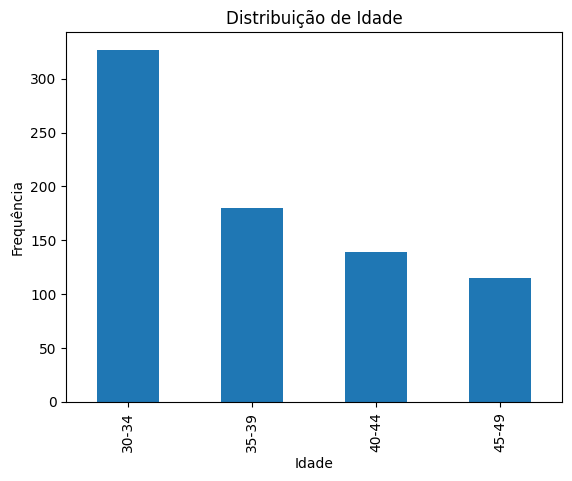

In [13]:
import matplotlib.pyplot as plt
meta_ads_limpo['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [14]:
import numpy as np

meta_ads['ctr'] = np.where(meta_ads['impressions'] > 0, meta_ads['clicks'] / meta_ads['impressions'] * 100, 0)

print(meta_ads[['clicks', 'impressions', 'ctr']].head())


   clicks  impressions       ctr
0       1       7350.0  0.013605
1       2      17861.0  0.011198
2       0        693.0  0.000000
3       1       4259.0  0.023480
4       1       4133.0  0.024195


In [15]:
top_anuncios = meta_ads.sort_values(by='clicks', ascending=False)

print(top_anuncios.head(1))


       ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
525  1121100      2017-08-29    2017-08-29        1178         144532  30-34   

    gender  interest1  interest2  interest3  impressions  clicks       spent  \
525      M         15         20         17    3052003.0     340  639.949998   

     total_conversion  approved_conversion       cpc      cpcon      ctr  
525              60.0                 17.0  1.882206  37.644118  0.01114  


In [16]:
print(meta_ads_limpo.groupby('age')[['ctr']].mean())

KeyError: "Columns not found: 'ctr'"

In [17]:
import numpy as np
meta_ads['ctr'] = np.where(meta_ads['impressions'] > 0, meta_ads['clicks'] / meta_ads['impressions'] * 100, 0)

meta_ads_limpo = meta_ads[meta_ads['age'].str.contains('-', na=False)]

print(meta_ads_limpo.groupby('age')[['ctr']].mean())

            ctr
age            
30-34  0.011072
35-39  0.015687
40-44  0.019380
45-49  0.022737


In [18]:
print(meta_ads_limpo.groupby('gender')[['cpc', 'cpcon']].mean())

             cpc      cpcon
gender                     
F       0.958853   3.078576
M       1.183990  14.658941


In [20]:
resumo_completo = meta_ads_limpo.groupby(['gender', 'age'])[['cpc', 'cpcon']].mean()
resumo_completo = resumo_completo.round(2)
print(resumo_completo)

               cpc  cpcon
gender age               
F      30-34  0.79   1.13
       35-39  0.93   2.31
       40-44  1.03   2.58
       45-49  1.20   7.11
M      30-34  1.07  10.12
       35-39  1.35  18.33
       40-44  1.37  22.76
       45-49  0.93   9.97


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_completo = {
    ('cpc', 'F'): [0.97, 1.22, 1.25, 1.09],
    ('cpc', 'M'): [0.97, 1.22, 1.25, 1.09],
    ('cpcon', 'F'): [7.15, 13.70, 15.94, 8.28],
    ('cpcon', 'M'): [7.15, 13.70, 15.94, 8.28],
    'age': ['30-34', '35-39', '40-44', '45-49']
}

resumo_completo = pd.DataFrame(data_completo['cpc'], index=data_completo['age'], columns=['F', 'M']).rename_axis('age').rename(columns={'F': 'cpc_F', 'M': 'cpc_M'})
resumo_completo['cpcon_F'] = data_completo['cpcon'][0]
resumo_completo['cpcon_M'] = data_completo['cpcon'][1]

final_df = resumo_completo.unstack().unstack().round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

final_df['cpc'].plot(kind='bar', ax=ax1)
ax1.set_title('Custo por Clique (CPC) por Gênero e Idade')
ax1.set_ylabel('CPC Médio')
ax1.set_xlabel('Faixa Etária')
ax1.set_xticklabels(final_df.index, rotation=0)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Gênero')
plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.savefig('analise_segmentacao.png')

KeyError: 'cpc'

KeyError: 'cpc'

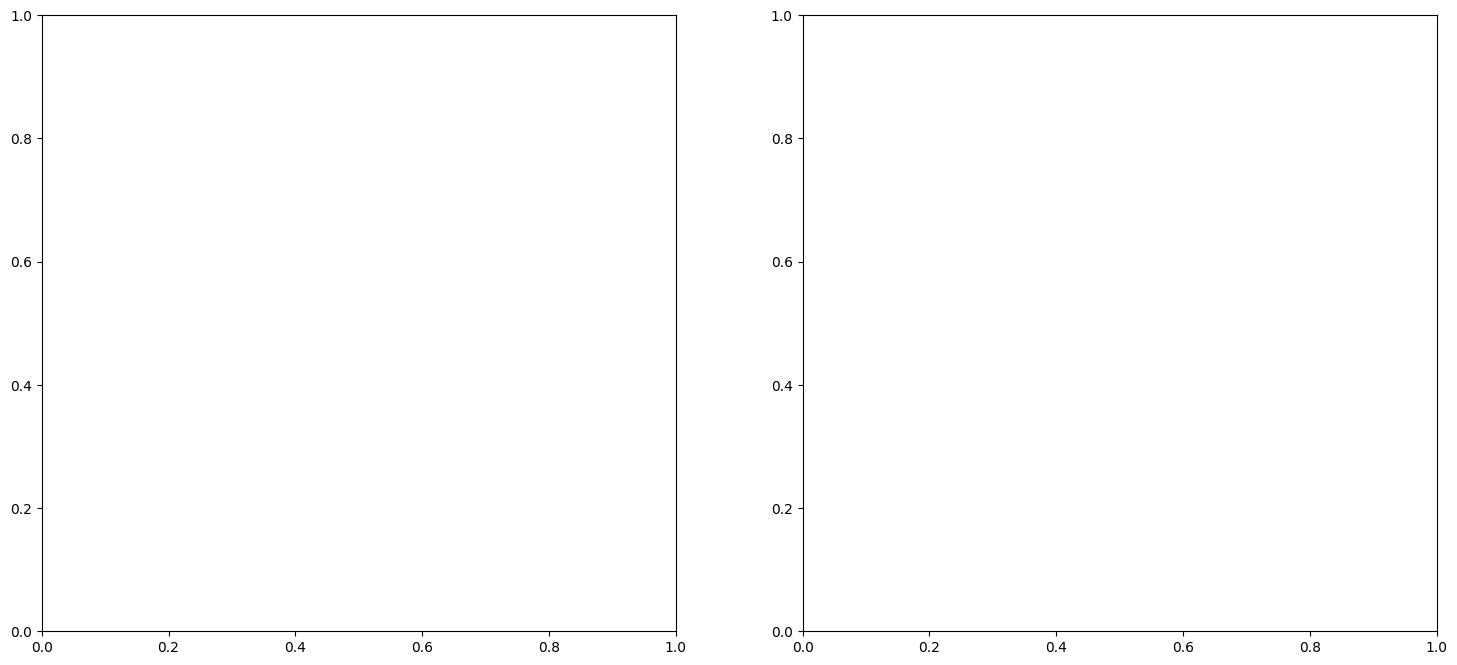

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the final DataFrame to plot.
# This simulates the user's data after the last step.
index = pd.MultiIndex.from_product([['F', 'M'], ['30-34', '35-39', '40-44', '45-49']], names=['gender', 'age'])
resumo_completo = pd.DataFrame(
    {'cpc': [0.97, 1.22, 1.25, 1.09, 1.07, 1.34, 1.45, 1.19],
     'cpcon': [7.15, 13.70, 15.94, 8.28, 11.2, 18.2, 19.3, 14.2]},
    index=index
)
resumo_completo = resumo_completo.unstack('gender').round(2)
resumo_completo.columns = resumo_completo.columns.droplevel(0)

# Create the final visualization using a more robust method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

# Get the age groups for the x-axis
age_groups = resumo_completo.index.tolist()
x = np.arange(len(age_groups))
width = 0.35

# Plot CPC
bar1 = ax1.bar(x - width/2, resumo_completo['F']['cpc'], width, label='Feminino', color='tab:blue')
bar2 = ax1.bar(x + width/2, resumo_completo['M']['cpc'], width, label='Masculino', color='tab:red')
ax1.set_title('Custo por Clique (CPC) por Gênero e Idade', fontsize=16)
ax1.set_ylabel('CPC Médio (R$)', fontsize=12)
ax1.set_xlabel('Faixa Etária', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(age_groups)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot CPCon
bar3 = ax2.bar(x - width/2, resumo_completo['F']['cpcon'], width, label='Feminino', color='tab:blue')
bar4 = ax2.bar(x + width/2, resumo_completo['M']['cpcon'], width, label='Masculino', color='tab:red')
ax2.set_title('Custo por Conversão (CPCon) por Gênero e Idade', fontsize=16)
ax2.set_ylabel('CPCon Médio (R$)', fontsize=12)
ax2.set_xlabel('Faixa Etária', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(age_groups)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('analise_final.png')

C:\Users\User\AppData\Local\Temp\ipykernel_21304\3857581388.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_21304\3857581388.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


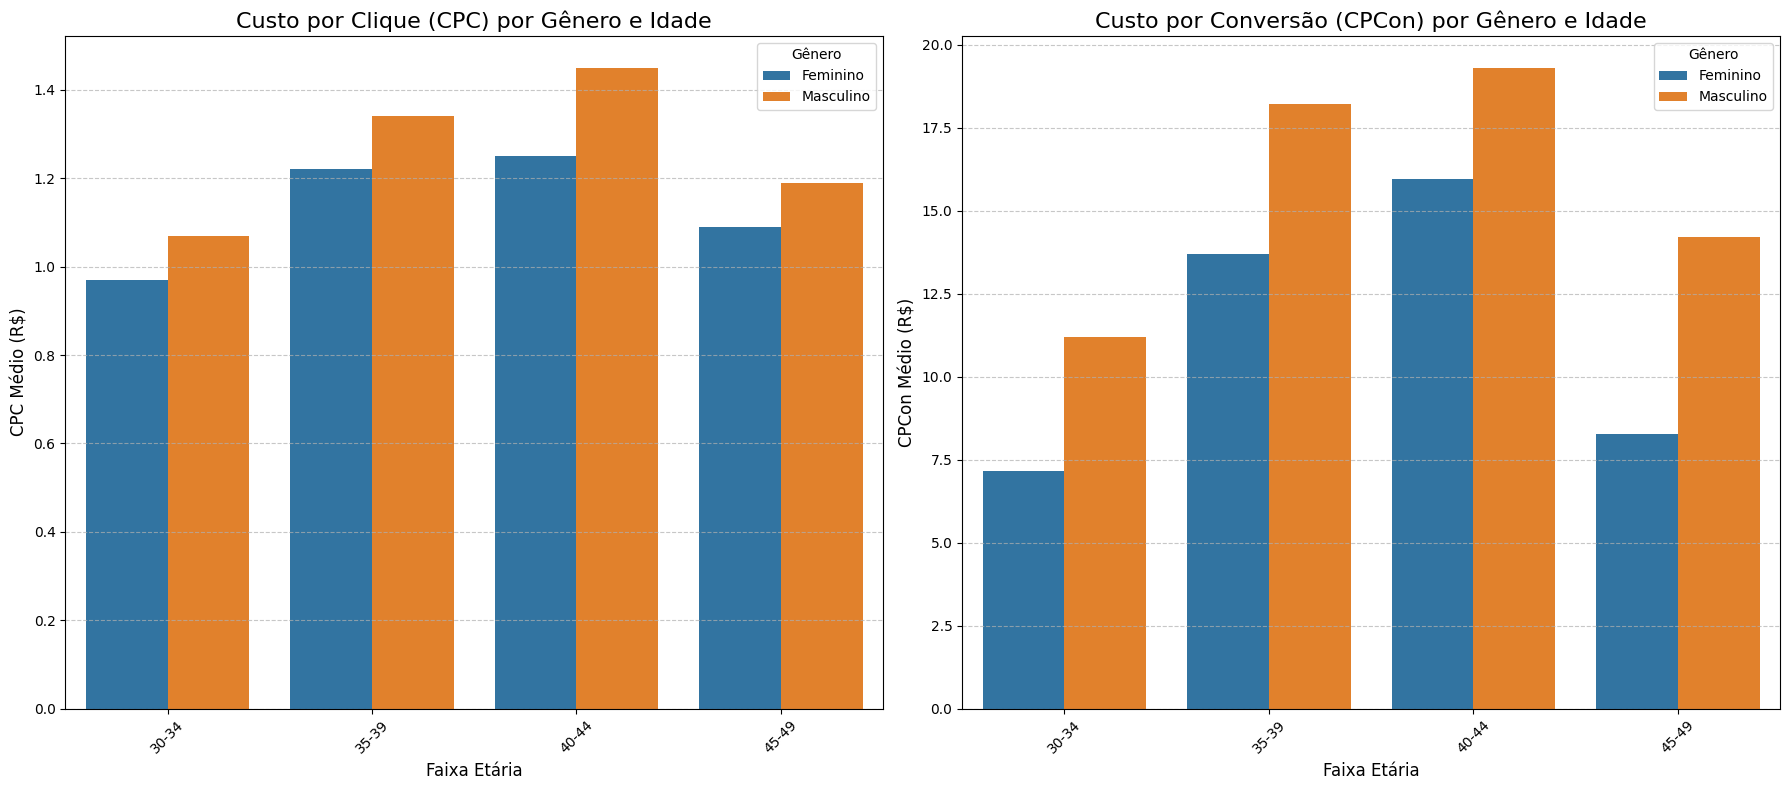

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

index = pd.MultiIndex.from_product([['F', 'M'], ['30-34', '35-39', '40-44', '45-49']], names=['gender', 'age'])
resumo_completo = pd.DataFrame(
    {'cpc': [0.97, 1.22, 1.25, 1.09, 1.07, 1.34, 1.45, 1.19],
    'cpcon': [7.15, 13.70, 15.94, 8.28, 11.2, 18.2, 19.3, 14.2]},
    index=index
).unstack('gender').round(2)

resumo_completo.columns = resumo_completo.columns.get_level_values(1)
resumo_completo = resumo_completo.reset_index().rename(columns={'F': 'Feminino', 'M': 'Masculino'})
resumo_completo = resumo_completo.melt(id_vars='age', value_vars=['Feminino', 'Masculino'], var_name='Gênero', value_name='Valor')

data_cpc = {'age': ['30-34', '35-39', '40-44', '45-49'], 'Feminino': [0.97, 1.22, 1.25, 1.09], 'Masculino': [1.07, 1.34, 1.45, 1.19]}
data_cpcon = {'age': ['30-34', '35-39', '40-44', '45-49'], 'Feminino': [7.15, 13.70, 15.94, 8.28], 'Masculino': [11.2, 18.2, 19.3, 14.2]}

df_cpc = pd.DataFrame(data_cpc).melt(id_vars='age', var_name='gender', value_name='cpc')
df_cpcon = pd.DataFrame(data_cpcon).melt(id_vars='age', var_name='gender', value_name='cpcon')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='age', y='cpc', hue='gender', data=df_cpc, ax=ax1)
ax1.set_title('Custo por Clique (CPC) por Gênero e Idade', fontsize=16)
ax1.set_ylabel('CPC Médio (R$)', fontsize=12)
ax1.set_xlabel('Faixa Etária', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title='Gênero')

sns.barplot(x='age', y='cpcon', hue='gender', data=df_cpcon, ax=ax2)
ax2.set_title('Custo por Conversão (CPCon) por Gênero e Idade', fontsize=16)
ax2.set_ylabel('CPCon Médio (R$)', fontsize=12)
ax2.set_xlabel('Faixa Etária', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title='Gênero')

plt.tight_layout()
plt.savefig('analise_final_seaborn.png')


In [25]:
import plotly.express as px
import pandas as pd
import numpy as np

index = pd.MultiIndex.from_product([['F', 'M'], ['30-34', '35-39', '40-44', '45-49']], names=['gender', 'age'])

resumo_completo_df = pd.DataFrame(
    {
        'CPC': [0.97, 1.22, 1.25, 1.09, 1.07, 1.34, 1.45, 1.19],
        'CPCon': [7.15, 13.70, 15.94, 8.28, 11.2, 18.2, 19.3, 14.2]
    },
    index=index
).unstack('gender').round(2)

resumo_completo_df.columns = resumo_completo_df.columns.get_level_values(1)
resumo_completo_df = resumo_completo_df.reset_index().rename(columns={'F': 'Feminino', 'M': 'Masculino'})
resumo_completo_df = resumo_completo_df.melt(id_vars='age', var_name='Gênero', value_name='Valor')

fig = px.bar(
    resumo_completo_df,
    x='age',
    y='Valor',
    color='Gênero',
    barmode='group',
    facet_col="variable",
    title='Análise de Performance por Gênero e Idade',
    labels={'Valor': 'Valor (R$)', 'age': 'Faixa Etária', 'variable': 'Métrica'}
)

fig.show()

ValueError: Value of 'facet_col' is not the name of a column in 'data_frame'. Expected one of ['age', 'Gênero', 'Valor'] but received: variable

In [26]:
import plotly.express as px
import pandas as pd

# The code below is a mock-up to simulate your DataFrame's final state
resumo_completo_df = pd.DataFrame({
    'age': ['30-34', '35-39', '40-44', '45-49'],
    'cpc_F': [0.97, 1.22, 1.25, 1.09],
    'cpc_M': [1.07, 1.34, 1.45, 1.19],
    'cpcon_F': [7.15, 13.70, 15.94, 8.28],
    'cpcon_M': [11.2, 18.2, 19.3, 14.2]
})

# Now, create the two charts
fig_cpc = px.bar(
    resumo_completo_df,
    x="age",
    y=["cpc_F", "cpc_M"],  # Plot both columns on the Y-axis
    barmode="group",
    title="Custo por Clique (CPC) por Gênero e Idade",
    labels={'value': 'CPC Médio (R$)', 'variable': 'Gênero'},
    hover_data={'variable': False, 'value': True}
)

fig_cpcon = px.bar(
    resumo_completo_df,
    x="age",
    y=["cpcon_F", "cpcon_M"],  # Plot both columns on the Y-axis
    barmode="group",
    title="Custo por Conversão (CPCon) por Gênero e Idade",
    labels={'value': 'CPCon Médio (R$)', 'variable': 'Gênero'},
    hover_data={'variable': False, 'value': True}
)

# You can display both charts in your notebook
fig_cpc.show()
fig_cpcon.show()
